# Importing the Libraries

In [3]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# Model Building

In [ ]:
df = pd.read_csv('NEW_LOAN_DATA.csv')
df

In [58]:
df.dtypes

loan_amnt                              float64
int_rate                               float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
collection_recovery_fee                float64
acc_now_delinq                         float64
delinq_amnt                            float64
pub_rec_bankruptcies                   float64
tax_liens                              float64
home_ownership_MORTGAGE                  int64
home_ownership_OTHER                     int64
home_ownership_OWN                       int64
home_ownership_RENT                      int64
verification_

In [59]:
features = df[df.columns.drop('loan_status')]     # X
target = df['loan_status']                        # Y

# Solving the problem of class imbalance by Oversampling using imblearn's SMOTE technique

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_resample(features, target)

Text(0, 0.5, 'No of rows')

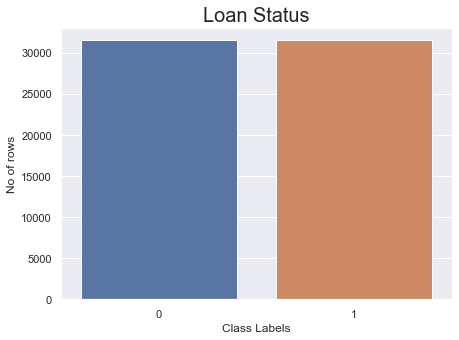

In [61]:
sns.set(rc = {'figure.figsize':(7,5)})

sns.barplot(y_train_new.value_counts().index, y_train_new.value_counts().values)
plt.title('Loan Status', fontsize=20)

plt.xlabel("Class Labels")
plt.ylabel("No of rows")

# Splitting the dataset into training and testing set

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_train_new, y_train_new, test_size=0.25, random_state=42)

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)

In [64]:
accuracy_score(predictions, Y_test)

0.8465154691569786

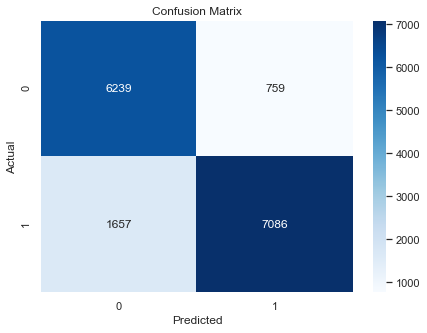

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predictions, Y_test)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      6998
           1       0.90      0.81      0.85      8743

    accuracy                           0.85     15741
   macro avg       0.85      0.85      0.85     15741
weighted avg       0.85      0.85      0.85     15741



# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced")

rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

In [68]:
accuracy_score(predictions, Y_test)

0.964170001905851

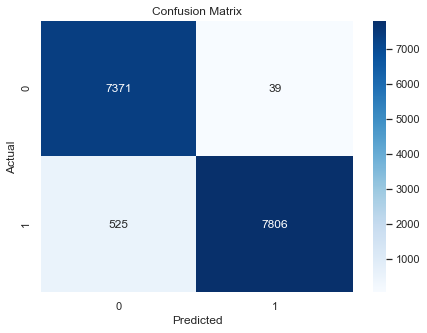

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predictions, Y_test)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7410
           1       1.00      0.94      0.97      8331

    accuracy                           0.96     15741
   macro avg       0.96      0.97      0.96     15741
weighted avg       0.97      0.96      0.96     15741



# Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

accuracy_score(predictions, Y_test)

0.9320246490057811

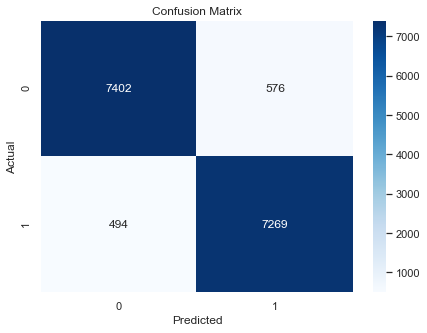

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predictions, Y_test)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(predictions, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7978
           1       0.93      0.94      0.93      7763

    accuracy                           0.93     15741
   macro avg       0.93      0.93      0.93     15741
weighted avg       0.93      0.93      0.93     15741

